In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pandas_ta as ta
import yfinance as yf

from matplotlib.pyplot import figure

%matplotlib widget
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

from invaas.schwab.cnn_fear_greed_index import get_current_cnn_data

In [38]:
cnn_data = get_current_cnn_data()

df_cnn = None

for key in cnn_data.keys():
    if key != "fear_and_greed":
        df_data = pd.DataFrame(data=cnn_data[key]["data"][:-1])[["x", "y"]].rename(columns={"x": "timestamp", "y": key})
        # print(key, len(df_data))
        df_cnn = df_data if df_cnn is None else pd.merge(df_cnn, df_data, on="timestamp", how="outer")

df_cnn["timestamp"] = pd.to_datetime(df_cnn.timestamp, unit="ms")
df_cnn.set_index(pd.DatetimeIndex(df_cnn.timestamp), inplace=True)
df_cnn.drop(columns=["timestamp"], inplace=True)
df_cnn.dropna(subset=["fear_and_greed_historical"], inplace=True)
df_cnn

,fear_and_greed_historical,market_momentum_sp500,market_momentum_sp125,stock_price_strength,stock_price_breadth,put_call_options,market_volatility_vix,market_volatility_vix_50,junk_bond_demand,safe_haven_demand
timestamp,,,,,,,,,,
2023-03-06,55.257143,4048.42,3907.18472,1.500647,986.501753,0.952653,18.61,20.2464,2.039200,1.535980
2023-03-07,48.514286,3986.37,3907.81016,1.433825,932.583858,0.987574,19.59,20.2368,2.039200,-1.509329
2023-03-08,49.828571,3992.01,3907.90728,1.327385,885.032911,1.012177,19.11,20.1796,2.013900,0.107319
2023-03-09,37.542857,3918.32,3907.20440,1.181795,800.218285,1.031997,22.61,20.2144,2.029800,-1.919133
2023-03-10,26.885714,3861.59,3905.55824,0.777586,688.304493,1.114923,24.80,20.2774,2.055300,-5.767492
...,...,...,...,...,...,...,...,...,...,...
2024-02-28,78.114286,5069.76,4596.24712,4.669024,1211.406963,0.717805,13.84,13.4968,1.625489,7.125277
2024-02-29,76.857143,5096.27,4600.89832,4.789007,1237.328729,0.702385,13.40,13.5192,1.618885,6.765807
2024-03-01,78.171429,5137.08,4605.93368,5.021727,1273.084173,0.702063,13.11,13.5302,1.605468,4.978788


In [27]:
df_cnn.corr()

,fear_and_greed_historical,market_momentum_sp500,market_momentum_sp125,stock_price_strength,stock_price_breadth,put_call_options,market_volatility_vix,market_volatility_vix_50,junk_bond_demand,safe_haven_demand
fear_and_greed_historical,1.000000,0.589506,0.154436,0.789279,0.793187,-0.911585,-0.722511,-0.331118,-0.106659,0.759759
market_momentum_sp500,0.589506,1.000000,0.858892,0.618519,0.612329,-0.657161,-0.767454,-0.863250,-0.758216,0.508833
market_momentum_sp125,0.154436,0.858892,1.000000,0.241004,0.295759,-0.308816,-0.577611,-0.842801,-0.914729,0.227036
stock_price_strength,0.789279,0.618519,0.241004,1.000000,0.902510,-0.664826,-0.531482,-0.451424,-0.127216,0.379772
stock_price_breadth,0.793187,0.612329,0.295759,0.902510,1.000000,-0.681729,-0.638559,-0.502321,-0.198898,0.435238
put_call_options,-0.911585,-0.657161,-0.308816,-0.664826,-0.681729,1.000000,0.743446,0.407706,0.239330,-0.726324
market_volatility_vix,-0.722511,-0.767454,-0.577611,-0.531482,-0.638559,0.743446,1.000000,0.644892,0.516211,-0.659258
market_volatility_vix_50,-0.331118,-0.863250,-0.842801,-0.451424,-0.502321,0.407706,0.644892,1.000000,0.822310,-0.329750
junk_bond_demand,-0.106659,-0.758216,-0.914729,-0.127216,-0.198898,0.239330,0.516211,0.822310,1.000000,-0.259734
safe_haven_demand,0.759759,0.508833,0.227036,0.379772,0.435238,-0.726324,-0.659258,-0.329750,-0.259734,1.000000


In [26]:
print(yf.Ticker("^GSPC").info)
df_sp_500 = yf.Ticker("^GSPC").history(interval="1m", period="1d")
df_sp_500

{'maxAge': 86400, 'priceHint': 2, 'previousClose': 5130.95, 'open': 5110.52, 'dayLow': 5077.82, 'dayHigh': 5114.54, 'regularMarketPreviousClose': 5130.95, 'regularMarketOpen': 5110.52, 'regularMarketDayLow': 5077.82, 'regularMarketDayHigh': 5114.54, 'volume': 942328891, 'regularMarketVolume': 942328891, 'averageVolume': 4036084166, 'averageVolume10days': 4167331000, 'averageDailyVolume10Day': 4167331000, 'bid': 5080.35, 'ask': 5082.53, 'fiftyTwoWeekLow': 3808.86, 'fiftyTwoWeekHigh': 5149.67, 'fiftyDayAverage': 4894.2163, 'twoHundredDayAverage': 4532.753, 'currency': 'USD', 'exchange': 'SNP', 'quoteType': 'INDEX', 'symbol': '^GSPC', 'underlyingSymbol': '^GSPC', 'shortName': 'S&P 500', 'longName': 'S&P 500', 'firstTradeDateEpochUtc': -1325583000, 'timeZoneFullName': 'America/New_York', 'timeZoneShortName': 'EST', 'uuid': '8ffd55d1-3d1d-3733-a480-56768bc708e6', 'messageBoardId': 'finmb_INDEXGSPC', 'gmtOffSetMilliseconds': -18000000, 'trailingPegRatio': None}


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-03-05 09:30:00-05:00,5110.520020,5110.520020,5107.540039,5109.680176,0,0.0,0.0
2024-03-05 09:31:00-05:00,5110.009766,5110.549805,5108.240234,5109.250000,13897780,0.0,0.0
2024-03-05 09:32:00-05:00,5109.939941,5110.390137,5108.069824,5108.620117,9901164,0.0,0.0
2024-03-05 09:33:00-05:00,5108.399902,5108.740234,5105.939941,5106.600098,9421901,0.0,0.0
2024-03-05 09:34:00-05:00,5106.310059,5107.379883,5104.819824,5105.029785,9255415,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-05 11:46:00-05:00,5079.009766,5079.859863,5078.990234,5079.370117,4061453,0.0,0.0
2024-03-05 11:47:00-05:00,5079.379883,5081.259766,5079.379883,5081.259766,4160543,0.0,0.0
2024-03-05 11:48:00-05:00,5081.120117,5083.470215,5080.850098,5082.990234,4146831,0.0,0.0


MSE: 9.931
R2: 0.966


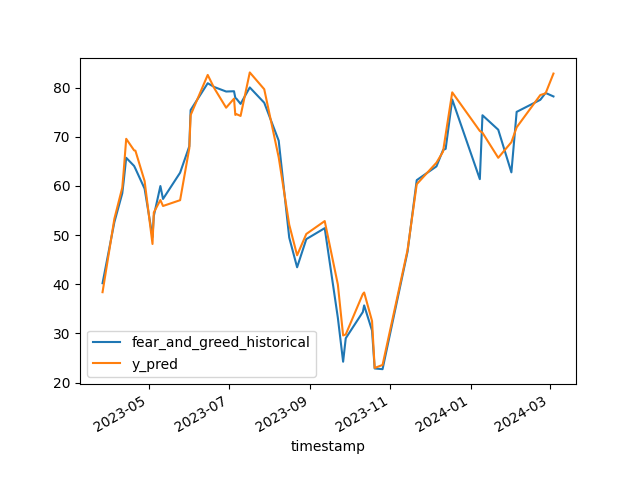

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

y_col = "fear_and_greed_historical"

# test_amount = 2
# df_train = df_cnn.iloc[:(0-test_amount)]
# df_test = df_cnn.tail(test_amount)
df_train, df_test = train_test_split(df_cnn, test_size=0.2)

y_train = df_train[y_col].to_numpy()
y_test = df_test[y_col].to_numpy()
X_train = df_train.drop(columns=y_col).to_numpy()
X_test = df_test.drop(columns=y_col).to_numpy()

# regr = GradientBoostingRegressor()
regr = LinearRegression()
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)
df_test["y_pred"] = y_pred

# The mean squared error
print(f"MSE: {mean_squared_error(y_test, y_pred):.3f}")
# The coefficient of determination: 1 is perfect prediction
print(f"R2: {r2_score(y_test, y_pred):.3f}")

df_test[[y_col, "y_pred"]].plot()
plt.show()